In [1]:
from sdhelper import SD

# load model
sd = SD('SD-1.5')

# generate image
img = sd('a very cute happy cat', seed=42).result_image

# extract representations from the `up[1]` block at time step 50
r = sd.img2repr(img, extract_positions=['up_blocks[1]'], step=50, seed=42)

# compute similarity between all pairs of tokens in `r`
similarities = r.cosine_similarity(r)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

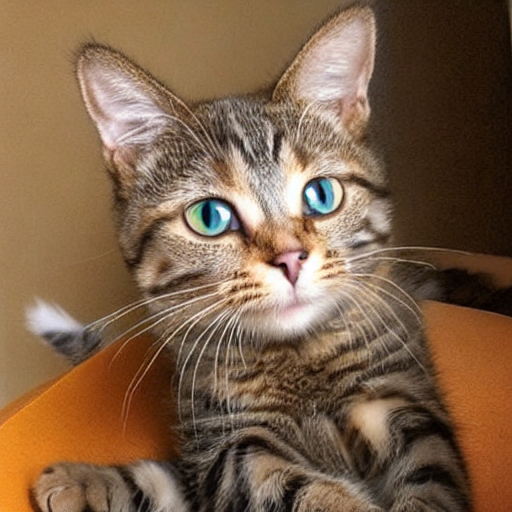

In [2]:
img

In [3]:
r['up_blocks[1]'].shape

torch.Size([1, 1280, 32, 32])

In [4]:
sd.get_representation_shapes()

  0%|          | 0/1 [00:00<?, ?it/s]

({'conv_in': (2, 320, 64, 64),
  'down_blocks[0]': (2, 320, 32, 32),
  'down_blocks[1]': (2, 640, 16, 16),
  'down_blocks[2]': (2, 1280, 8, 8),
  'down_blocks[3]': (2, 1280, 8, 8),
  'mid_block': (2, 1280, 8, 8),
  'up_blocks[0]': (2, 1280, 16, 16),
  'up_blocks[1]': (2, 1280, 32, 32),
  'up_blocks[2]': (2, 640, 64, 64),
  'up_blocks[3]': (2, 320, 64, 64),
  'conv_out': (2, 4, 64, 64)},
 (3, 512, 512))

In [5]:
similarities.shape

torch.Size([32, 32, 32, 32])

In [6]:
img2 = sd('a fluffy dog in the snow, with big ears', seed=0).result_image
r2 = sd.img2repr(img2, extract_positions=['up_blocks[1]'], step=50, seed=0)

  0%|          | 0/50 [00:00<?, ?it/s]

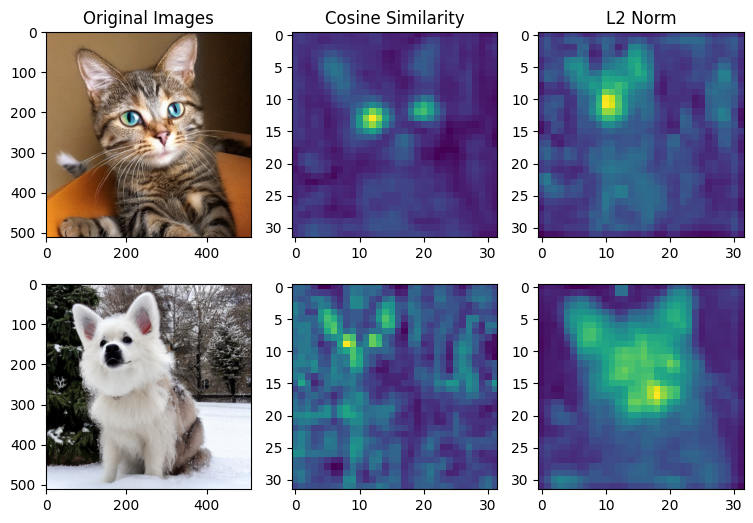

In [7]:
import matplotlib.pyplot as plt

reference_position = (13, 12)

fig, axs = plt.subplots(2, 3, figsize=(9, 6))
axs[0, 0].imshow(img)
axs[1, 0].imshow(img2)
axs[0, 1].imshow(similarities[reference_position])
axs[1, 1].imshow(r.cosine_similarity(r2)[reference_position])
axs[0, 2].imshow(r2['up_blocks[1]'].norm(dim=1).squeeze())
axs[1, 2].imshow(r['up_blocks[1]'].norm(dim=1).squeeze())

axs[0, 0].set_title('Original Images')
axs[0, 1].set_title('Cosine Similarity')
axs[0, 2].set_title('L2 Norm')

plt.show()